<a href="https://colab.research.google.com/github/Dhruvinsinh/VISION_HD/blob/main/Vision_hd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/shadow2496/VITON-HD.git
%cd ./VITON-HD/

Cloning into 'VITON-HD'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 49 (delta 10), reused 7 (delta 6), pack-reused 31 (from 1)
Receiving objects: 100% (49/49), 5.03 MiB | 11.47 MiB/s, done.
Resolving deltas: 100% (17/17), done.
/content/VITON-HD


In [2]:
!pip install torch==1.6.0+cu92 torchvision==0.7.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.6.0+cu92 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2, 2.1.0, 2.1.0+cpu, 2.1.0+cpu.cxx11.abi, 2.1.0+cu118, 2.1.0+cu121, 2.1

In [3]:
!pip install opencv-python torchgeometry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 3.7 MB/s eta 0:00:00


In [4]:
import torch
!nvidia-smi

Sun Jan  5 09:18:39 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
torch.cuda.is_available()

True

In [6]:
import gdown
gdown.download('https://drive.google.com/u/0/uc?export=download&confirm=PAd9&id=1s0r8e4tvQMcp8AD0k7JOHetCEuRuY0Zk', 'checkpoints-20211102T134153Z-001.zip', quiet=False)
%cd /content/VITON-HD/checkpoints


Downloading...
From: https://drive.google.com/u/0/uc?export=download&confirm=PAd9&id=1s0r8e4tvQMcp8AD0k7JOHetCEuRuY0Zk
To: /content/VITON-HD/checkpoints-20211102T134153Z-001.zip
100%|██████████| 572M/572M [00:18<00:00, 31.1MB/s]

/content/VITON-HD/checkpoints


In [7]:

import zipfile
path_to_zip_file='/content/VITON-HD/checkpoints-20211102T134153Z-001.zip'
directory_to_extract_to='content/VITON-HD/checkpoints'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

%cd ..


/content/VITON-HD


In [8]:
%mv /content/VITON-HD/checkpoints/content/VITON-HD/checkpoints/checkpoints/*.pth /content/VITON-HD/checkpoints

In [17]:
!wget  https://drive.google.com/file/d/1ZA2C8yMOprwc0TV4hvrt0X-ljZugrClq/view?usp=drive_link -O datasets-20211102T134151Z-001.zip

--2025-01-05 09:27:14--  https://drive.google.com/file/d/1ZA2C8yMOprwc0TV4hvrt0X-ljZugrClq/view?usp=drive_link
Resolving drive.google.com (drive.google.com)... 74.125.24.100, 74.125.24.139, 74.125.24.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.24.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘datasets-20211102T134151Z-001.zip’

datasets-20211102T1     [ <=>                ]  91.52K  --.-KB/s    in 0.04s   

2025-01-05 09:27:16 (2.48 MB/s) - ‘datasets-20211102T134151Z-001.zip’ saved [93714]



In [20]:
!unzip /content/VITON-HD/datasets-20211102T134151Z-001

Archive:  /content/VITON-HD/datasets-20211102T134151Z-001.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/VITON-HD/datasets-20211102T134151Z-001 or
        /content/VITON-HD/datasets-20211102T134151Z-001.zip, and cannot find /content/VITON-HD/datasets-20211102T134151Z-001.ZIP, period.


In [21]:
!unzip /content/VITON-HD/test.zip

Archive:  /content/VITON-HD/test.zip
   creating: test/
   creating: test/cloth/
  inflating: test/cloth/02783_00.jpg  
  inflating: test/cloth/07429_00.jpg  
  inflating: test/cloth/11028_00.jpg  
  inflating: test/cloth/11351_00.jpg  
  inflating: test/cloth/01430_00.jpg  
  inflating: test/cloth/03751_00.jpg  
  inflating: test/cloth/06802_00.jpg  
  inflating: test/cloth/08348_00.jpg  
  inflating: test/cloth/09933_00.jpg  
  inflating: test/cloth/06429_00.jpg  
  inflating: test/cloth/11791_00.jpg  
  inflating: test/cloth/01260_00.jpg  
   creating: test/cloth-mask/
  inflating: test/cloth-mask/02783_00.jpg  
  inflating: test/cloth-mask/07429_00.jpg  
  inflating: test/cloth-mask/11028_00.jpg  
  inflating: test/cloth-mask/11351_00.jpg  
  inflating: test/cloth-mask/01430_00.jpg  
  inflating: test/cloth-mask/03751_00.jpg  
  inflating: test/cloth-mask/06802_00.jpg  
  inflating: test/cloth-mask/08348_00.jpg  
  inflating: test/cloth-mask/09933_00.jpg  
  inflating: test/cloth-m

In [22]:
%mv /content/VITON-HD/test /content/VITON-HD/datasets

In [24]:
#%env CUDA_VISIBLE_DEVICES=[GPU_ID]
!python /content/VITON-HD/test.py --name [NAME]

Namespace(name='[NAME]', batch_size=1, workers=1, load_height=1024, load_width=768, shuffle=False, dataset_dir='./datasets/', dataset_mode='test', dataset_list='test_pairs.txt', checkpoint_dir='./checkpoints/', save_dir='./results/', display_freq=1, seg_checkpoint='seg_final.pth', gmm_checkpoint='gmm_final.pth', alias_checkpoint='alias_final.pth', semantic_nc=13, init_type='xavier', init_variance=0.02, grid_size=5, norm_G='spectralaliasinstance', ngf=64, num_upsampling_layers='most')
Network [SegGenerator] was created. Total number of parameters: 34.5 million. To see the architecture, do print(network).
Network [ALIASGenerator] was created. Total number of parameters: 100.5 million. To see the architecture, do print(network).
/content/VITON-HD/utils.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code dur

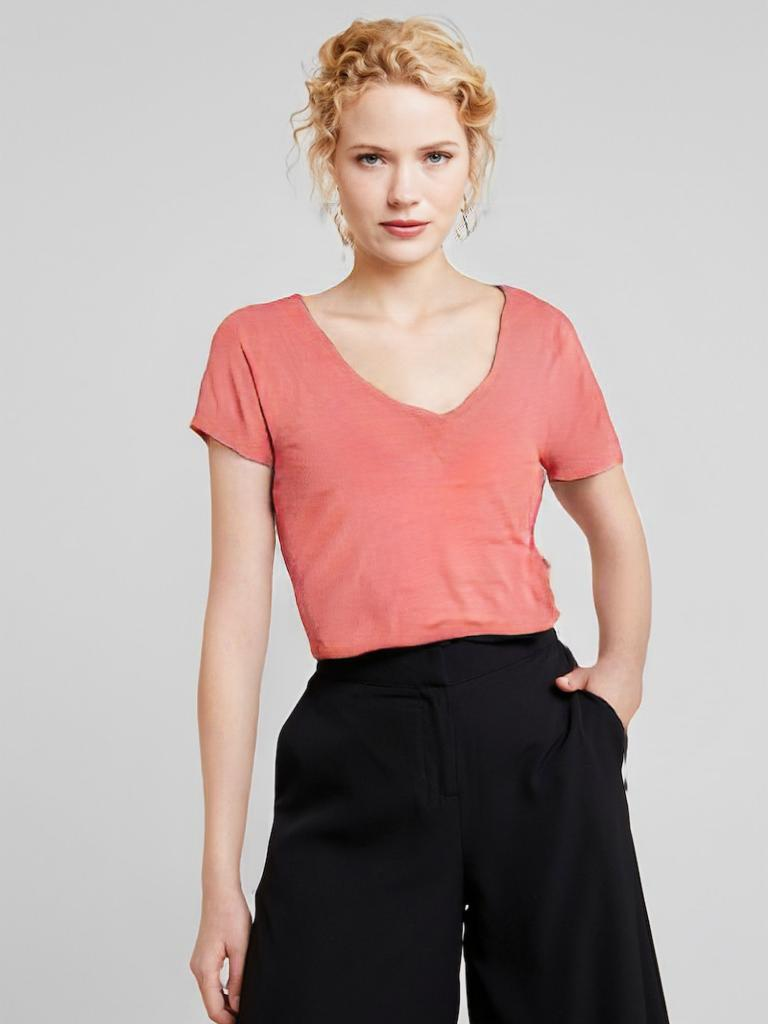

In [25]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('/content/VITON-HD/results/[NAME]/07573_11791_00.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)